In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

us-election-2020-result-analysis.ipynb


us-election-2020-president-county-candidate.ipynb

In [ ]:
df = pd.read_csv('president_county_candidate.csv')
df.head(10)

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False
3,Delaware,Kent County,Howie Hawkins,GRN,420,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True
5,Delaware,New Castle County,Donald Trump,REP,88364,False
6,Delaware,New Castle County,Jo Jorgensen,LIB,2953,False
7,Delaware,New Castle County,Howie Hawkins,GRN,1282,False
8,Delaware,Sussex County,Donald Trump,REP,71230,True
9,Delaware,Sussex County,Joe Biden,DEM,56682,False


In [ ]:
df.tail(10)

,state,county,candidate,party,total_votes,won
32167,Arizona,La Paz County,Jo Jorgensen,LIB,93,False
32168,Arizona,La Paz County,Write-ins,WRI,2,False
32169,Arizona,Maricopa County,Joe Biden,DEM,1040774,True
32170,Arizona,Maricopa County,Donald Trump,REP,995665,False
32171,Arizona,Maricopa County,Jo Jorgensen,LIB,31705,False
32172,Arizona,Maricopa County,Write-ins,WRI,1331,False
32173,Arizona,Mohave County,Donald Trump,REP,78535,True
32174,Arizona,Mohave County,Joe Biden,DEM,24831,False
32175,Arizona,Mohave County,Jo Jorgensen,LIB,1302,False
32176,Arizona,Mohave County,Write-ins,WRI,37,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32177 entries, 0 to 32176
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   state        32177 non-null  object
 1   county       32177 non-null  object
 2   candidate    32177 non-null  object
 3   party        32177 non-null  object
 4   total_votes  32177 non-null  int64 
 5   won          32177 non-null  bool  
dtypes: bool(1), int64(1), object(4)
memory usage: 1.3+ MB


In [ ]:
df.isnull().sum()

state          0
county         0
candidate      0
party          0
total_votes    0
won            0
dtype: int64

In [ ]:
df.describe()

,total_votes
count,3.217700e+04
mean,4.960321e+03
std,3.581577e+04
min,0.000000e+00
25%,3.000000e+00
50%,3.400000e+01
75%,7.450000e+02
max,3.028885e+06


In [ ]:
df.columns

Index(['state', 'county', 'candidate', 'party', 'total_votes', 'won'], dtype='object')

In [ ]:
df.shape

(32177, 6)

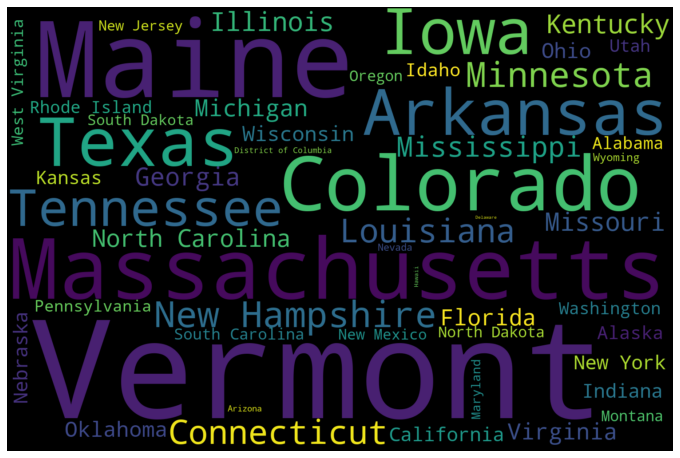

In [ ]:
count = df.state.value_counts()
count

sns.set_style("ticks")

wordcloud = WordCloud(width=1500,height=1000, scale=1,normalize_plurals=False,repeat=False,random_state=42,background_color='black').generate_from_frequencies(frequencies = count)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=3)
plt.show()

In [ ]:
jumlah_partai = df.party.value_counts().reset_index()
jumlah_partai

,index,party
0,REP,4633
1,LIB,4633
2,DEM,4633
3,WRI,3792
4,IND,3288
5,GRN,3034
6,ALI,1562
7,CST,1350
8,PSL,1028
9,ASP,745


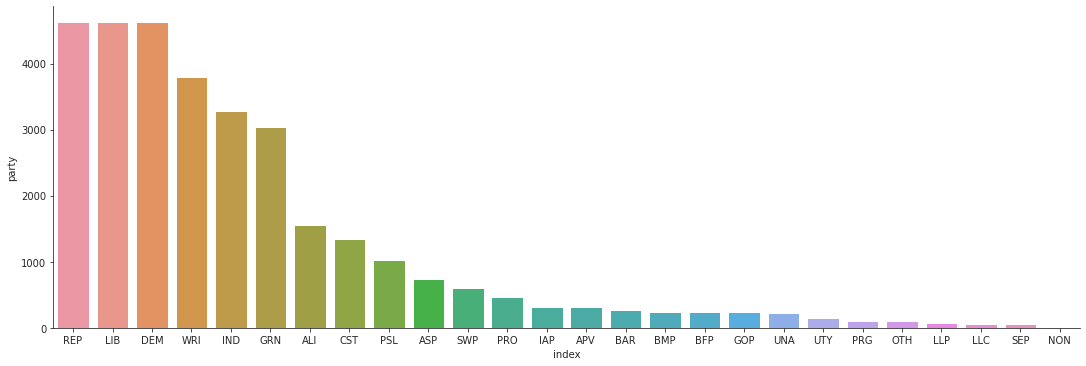

In [ ]:
sns.catplot(x="index", y="party", kind="bar", data=jumlah_partai,height=5, aspect=27/9,)

In [ ]:
df.candidate.value_counts().reset_index()


,index,candidate
0,Jo Jorgensen,4633
1,Donald Trump,4633
2,Joe Biden,4633
3,Write-ins,3792
4,Howie Hawkins,2994
5,Rocky De La Fuente,1562
6,Don Blankenship,1317
7,Brock Pierce,1124
8,Kanye West,1082
9,Gloria La Riva,1028


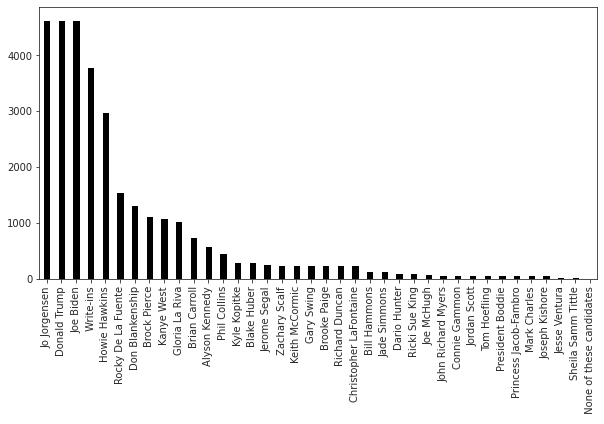

In [ ]:
plt.figure(figsize=(10,5))
df.candidate.value_counts().plot.bar(color= 'black')

In [ ]:
max_vote = df.groupby('candidate')['total_votes'].sum()
max_vote = pd.DataFrame(max_vote)
max_vote = max_vote.sort_values(by= 'total_votes',ascending=False)
top5_vote = max_vote.head(5)
top5_vote = top5_vote.reset_index()
#top5_max_voted_candidate.keys()
top5_vote

,candidate,total_votes
0,Joe Biden,82046434
1,Donald Trump,74585705
2,Jo Jorgensen,1874183
3,Howie Hawkins,404835
4,Write-ins,254274


<BarContainer object of 5 artists>

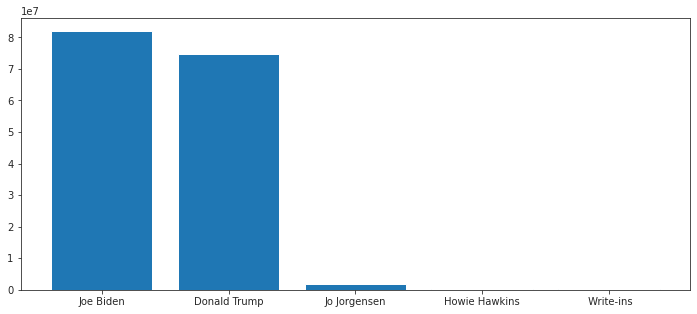

In [ ]:
plt.figure(figsize = (12,5))
plt.bar(top5_vote['candidate'],top5_vote['total_votes']) #,color=[ 'blue', 'red', 'green', 'cyan', 'yellow']

In [ ]:
max_partai = df.groupby('party')['total_votes'].sum()
max_partai = pd.DataFrame(max_partai)
max_partai = max_partai.sort_values(by= 'total_votes',ascending=False)
top5_partai = max_partai.head(5)
top5_partai = top5_partai.reset_index()
#top5_max_voted_candidate.keys()
top5_partai

,party,total_votes
0,DEM,82046434
1,REP,74585705
2,LIB,1874183
3,GRN,407508
4,WRI,254274
